In [1]:
#!pip install pandas matplotlib seaborn --quiet

# Comparación de Modelos de Predicción de Regalías por Artista
### Tesis de Maestría en Ciencia de Datos
Este notebook unifica y compara las métricas de desempeño de los modelos SARIMAX, XGBoost, Prophet y LSTM.
Se analizan métricas como RMSE, MAPE y se generan visualizaciones para evaluar el mejor modelo por artista.

In [2]:
import pandas as pd

# Cargar cada archivo de métricas
sarimax = pd.read_csv("sarimax_metrics_por_artista.csv")
xgboost = pd.read_csv("xgboost_metrics_por_artista.csv")
prophet = pd.read_csv("prophet_metrics_por_artista.csv")
lstm = pd.read_csv("lstm_metrics_por_artista.csv")

# Unir todos
df_modelos = pd.concat([sarimax, xgboost, prophet, lstm], ignore_index=True)
df_modelos.head()

,Artist_ID,Modelo,MSE,MAE,RMSE,MAPE
0,A01,SARIMAX,2.570176e+07,5069.689927,5069.689927,0.879858
1,A02,SARIMAX,3.855836e+07,6209.537441,6209.537441,0.809845
2,A03,SARIMAX,9.802454e+10,313088.714224,313088.714224,0.340418
3,A04,SARIMAX,5.848843e+06,2418.438044,2418.438044,0.637687
4,A05,SARIMAX,1.937525e+10,139194.994453,139194.994453,0.350152


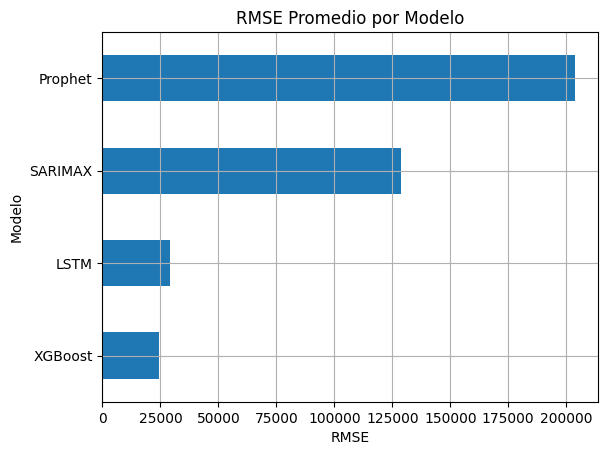

In [3]:
# RMSE promedio por modelo
df_modelos.groupby("Modelo")["RMSE"].mean().sort_values().plot(kind="barh", title="RMSE Promedio por Modelo")
import matplotlib.pyplot as plt
plt.xlabel("RMSE")
plt.grid(True)
plt.show()

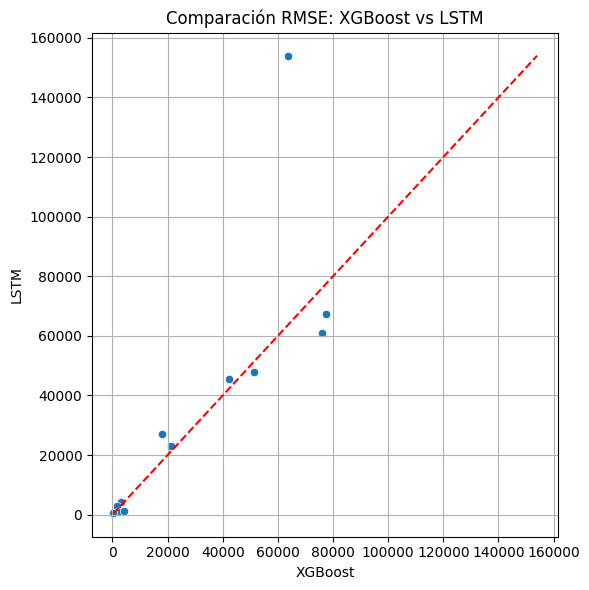

In [4]:
import seaborn as sns

# Comparación SARIMAX vs LSTM
xgboost_rmse = xgboost.set_index("Artist_ID")["RMSE"]
lstm_rmse = lstm.set_index("Artist_ID")["RMSE"]

comparativa = pd.DataFrame({
    'XGBoost': xgboost_rmse,
    'LSTM': lstm_rmse
}).dropna()

plt.figure(figsize=(6,6))
sns.scatterplot(x="XGBoost", y="LSTM", data=comparativa)
plt.plot([comparativa.min().min(), comparativa.max().max()],
         [comparativa.min().min(), comparativa.max().max()], 'r--')
plt.title("Comparación RMSE: XGBoost vs LSTM")
plt.grid(True)
plt.tight_layout()
plt.show()

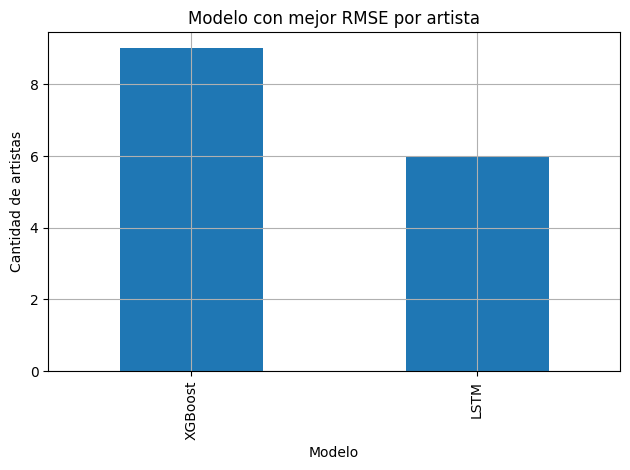

In [5]:
# Mejor modelo por artista (menor RMSE)
mejor_modelo = df_modelos.loc[df_modelos.groupby("Artist_ID")["RMSE"].idxmin()]
conteo = mejor_modelo["Modelo"].value_counts()
conteo.plot(kind="bar", title="Modelo con mejor RMSE por artista")
plt.ylabel("Cantidad de artistas")
plt.grid(True)
plt.tight_layout()
plt.show()

## Comparación por MAPE

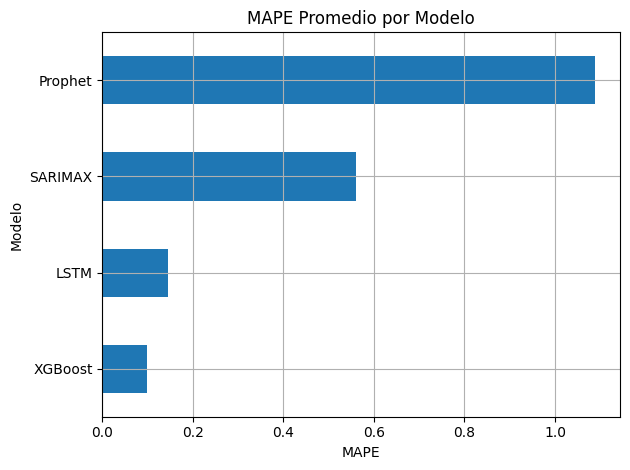

In [6]:
df_modelos.groupby("Modelo")["MAPE"].mean().sort_values().plot(kind="barh", title="MAPE Promedio por Modelo")
plt.xlabel("MAPE")
plt.grid(True)
plt.tight_layout()
plt.show()

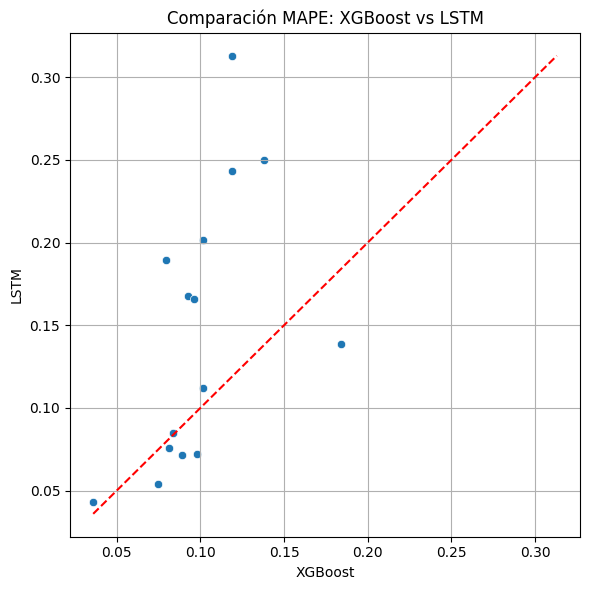

In [7]:
xgboost_mape = xgboost.set_index("Artist_ID")["MAPE"]
lstm_mape = lstm.set_index("Artist_ID")["MAPE"]

comparativa_mape = pd.DataFrame({
    'XGBoost': xgboost_mape,
    'LSTM': lstm_mape
}).dropna()

plt.figure(figsize=(6,6))
sns.scatterplot(x="XGBoost", y="LSTM", data=comparativa_mape)
plt.plot([comparativa_mape.min().min(), comparativa_mape.max().max()],
         [comparativa_mape.min().min(), comparativa_mape.max().max()], 'r--')
plt.title("Comparación MAPE: XGBoost vs LSTM")
plt.grid(True)
plt.tight_layout()
plt.show()

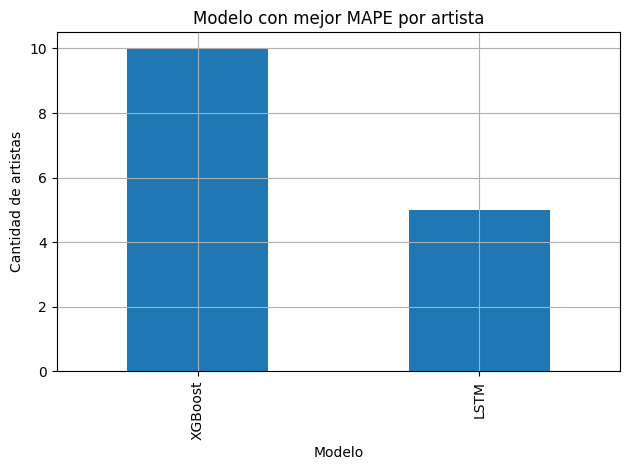

In [8]:
mejor_modelo_mape = df_modelos.loc[df_modelos.groupby("Artist_ID")["MAPE"].idxmin()]
conteo_mape = mejor_modelo_mape["Modelo"].value_counts()
conteo_mape.plot(kind="bar", title="Modelo con mejor MAPE por artista")
plt.ylabel("Cantidad de artistas")
plt.grid(True)
plt.tight_layout()
plt.show()

## Ranking general por artista (basado en RMSE)

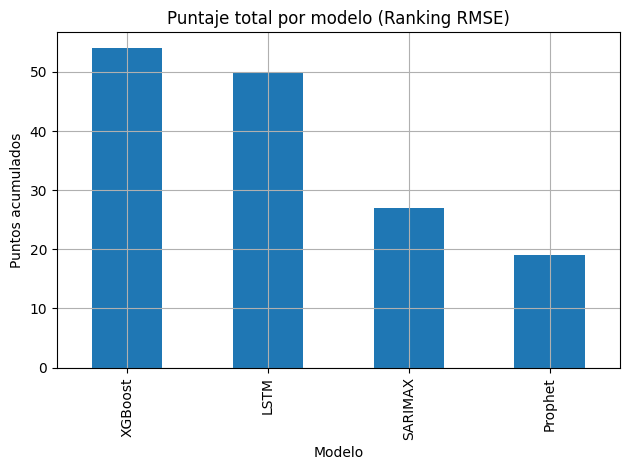

In [9]:
# Asignar puntos por posición (menor RMSE = mejor)
ranking_rmse = df_modelos.copy()
ranking_rmse["ranking"] = ranking_rmse.groupby("Artist_ID")["RMSE"].rank(method="min")
ranking_rmse["puntos"] = 5 - ranking_rmse["ranking"]  # 1° lugar = 4 pts, 4° = 1
puntos_totales = ranking_rmse.groupby("Modelo")["puntos"].sum().sort_values(ascending=False)

# Gráfico de puntaje acumulado por modelo
puntos_totales.plot(kind="bar", title="Puntaje total por modelo (Ranking RMSE)")
plt.ylabel("Puntos acumulados")
plt.grid(True)
plt.tight_layout()
plt.show()

Metricas Consolidadas

In [10]:
# Cargar los archivos
sarimax_df = pd.read_csv('sarimax_metrics_por_artista.csv')
lstm_df = pd.read_csv('lstm_metrics_por_artista.csv')
xgboost_df = pd.read_csv('xgboost_metrics_por_artista.csv')
prophet_df = pd.read_csv('prophet_metrics_por_artista.csv')


# Unir todos los DataFrames
df_consolidado = pd.concat([sarimax_df, lstm_df, xgboost_df, prophet_df], ignore_index=True)

# Guardar el DataFrame consolidado en un archivo Excel
df_consolidado.to_excel('modelos_prediccion_consolidado.xlsx', index=False)

In [11]:
df_consolidado

,Artist_ID,Modelo,MSE,MAE,RMSE,MAPE
0,A01,SARIMAX,2.570176e+07,5.069690e+03,5.069690e+03,0.879858
1,A02,SARIMAX,3.855836e+07,6.209537e+03,6.209537e+03,0.809845
2,A03,SARIMAX,9.802454e+10,3.130887e+05,3.130887e+05,0.340418
3,A04,SARIMAX,5.848843e+06,2.418438e+03,2.418438e+03,0.637687
4,A05,SARIMAX,1.937525e+10,1.391950e+05,1.391950e+05,0.350152
5,A06,SARIMAX,3.894806e+09,6.240838e+04,6.240838e+04,0.407730
6,A07,SARIMAX,1.666916e+10,1.291091e+05,1.291091e+05,0.169827
7,A08,SARIMAX,9.277362e+07,9.631906e+03,9.631906e+03,0.279312
8,A09,SARIMAX,6.784487e+06,2.604705e+03,2.604705e+03,0.155525
9,A10,SARIMAX,5.224945e+07,7.228378e+03,7.228378e+03,0.480502


In [12]:
import numpy as np

# Evitar divisiones por cero
df_consolidado['Peso_estimado'] = np.where(df_consolidado['MAPE'] > 0, df_consolidado['MAE'] / df_consolidado['MAPE'], 0)

# Normalizar los pesos por modelo
df_consolidado['Peso_normalizado'] = df_consolidado.groupby('Modelo')['Peso_estimado'].transform(lambda x: x / x.sum())

# Calcular MAPE ponderado
df_consolidado['MAPE_ponderado'] = df_consolidado['MAPE'] * df_consolidado['Peso_normalizado']

# Agrupar y calcular métricas finales
resumen_ponderado = df_consolidado.groupby('Modelo').agg({
    'MSE': 'mean',
    'MAE': 'mean',
    'RMSE': 'mean',
    'MAPE_ponderado': 'sum'  # ya está ponderado
}).reset_index()

# Renombrar columna
resumen_ponderado = resumen_ponderado.rename(columns={'MAPE_ponderado': 'MAPE'})

# Redondear y exportar
resumen_ponderado = resumen_ponderado.round(6)
resumen_ponderado.to_csv('Resumen_Promedio_por_Modelo.csv', index=False)


In [13]:
#resumen_ponderado.head()
resumen_ponderado.sort_values(by="MAPE", ascending=True)


,Modelo,MSE,MAE,RMSE,MAPE
3,XGBoost,1.402452e+09,18724.709677,24192.094934,0.081592
0,LSTM,2.747118e+09,24015.548171,29175.652601,0.103065
2,SARIMAX,8.505770e+10,128551.450817,128551.450817,0.492514
1,Prophet,1.493249e+11,182442.559239,203692.937624,0.793453


In [14]:
# Paso 1: Obtener el modelo con menor MAPE por artista
mejor_modelo_por_artista = df_consolidado.loc[
    df_consolidado.groupby('Artist_ID')['MAPE'].idxmin()
]

# Paso 2: Seleccionar columnas clave
resumen_por_artista = mejor_modelo_por_artista[[
    'Artist_ID', 'Modelo', 'MAPE', 'RMSE', 'MAE', 'MSE'
]].reset_index(drop=True)

# (Opcional) Renombrar columnas para presentación
resumen_por_artista = resumen_por_artista.rename(columns={
    'Artist_ID': 'Artista_ID',
    'Modelo': 'Mejor_Modelo',
    'MAPE': 'MAPE_Minimo'
})

# Exportar
resumen_por_artista.to_csv('Mejor_Modelo_Por_Artista.csv', index=False)


In [15]:
resumen_por_artista

,Artista_ID,Mejor_Modelo,MAPE_Minimo,RMSE,MAE,MSE
0,A01,XGBoost,0.137721,850.941249,634.101733,7.241010e+05
1,A02,LSTM,0.054117,575.900595,397.057254,3.508825e+05
2,A03,LSTM,0.075743,60971.302045,52305.158333,3.822100e+09
3,A04,XGBoost,0.119154,419.398030,334.765523,1.758947e+05
4,A05,XGBoost,0.083540,42116.863505,32829.643698,1.773830e+09
5,A06,XGBoost,0.092681,17921.470251,13846.055042,3.211791e+08
6,A07,LSTM,0.072279,67185.838129,50403.931458,6.334159e+09
7,A08,XGBoost,0.096149,3004.684085,2492.916917,9.028126e+06
8,A09,XGBoost,0.101673,1563.661994,1363.188777,2.445039e+06
9,A10,LSTM,0.071408,921.041801,835.747370,9.194839e+05


## Graficos para Documentacion

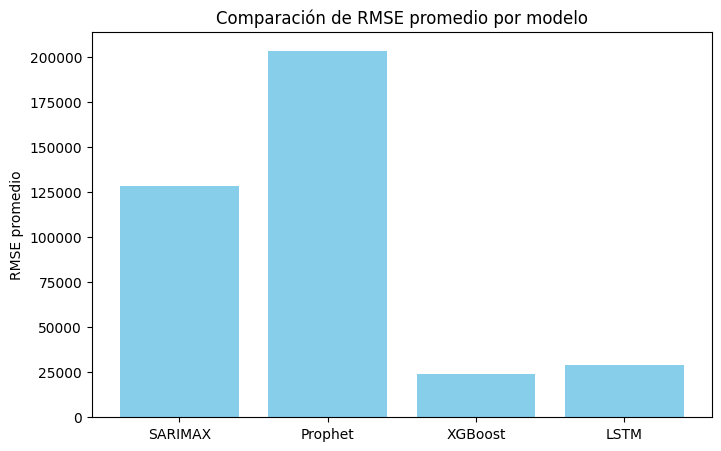

<Figure size 800x500 with 0 Axes>

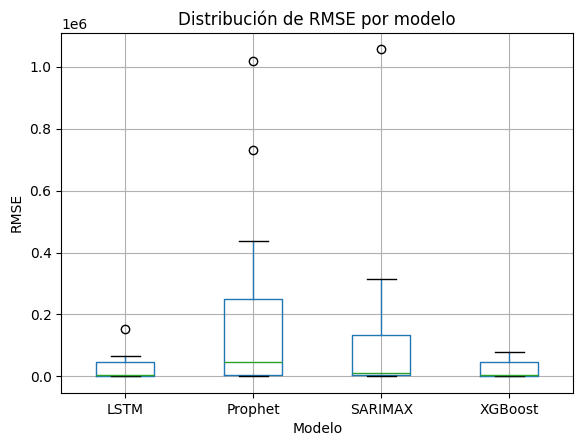

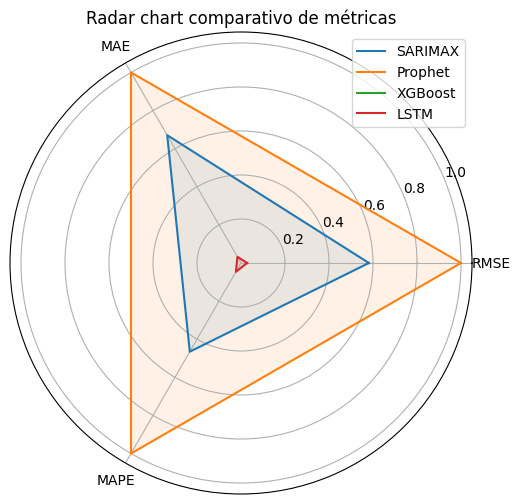

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar tus CSV con métricas por artista y modelo
sarimax = pd.read_csv("sarimax_metrics_por_artista.csv")
prophet = pd.read_csv("prophet_metrics_por_artista.csv")
xgboost = pd.read_csv("xgboost_metrics_por_artista.csv")
lstm = pd.read_csv("lstm_metrics_por_artista.csv")

# Consolidar en un solo DataFrame (ejemplo con RMSE, MAE, MAPE, R2)
modelos = {
    "SARIMAX": sarimax,
    "Prophet": prophet,
    "XGBoost": xgboost,
    "LSTM": lstm
}

df_resumen = pd.DataFrame([
    {
        "Modelo": nombre,
        "RMSE": datos["RMSE"].mean(),
        "MAE": datos["MAE"].mean(),
        "MAPE": datos["MAPE"].mean()
    }
    for nombre, datos in modelos.items()
])

# --- Gráfico de barras comparativo (RMSE global) ---
plt.figure(figsize=(8,5))
plt.bar(df_resumen["Modelo"], df_resumen["RMSE"], color="skyblue")
plt.title("Comparación de RMSE promedio por modelo")
plt.ylabel("RMSE promedio")
plt.show()

# --- Boxplot de errores por modelo (ejemplo RMSE) ---
df_boxplot = pd.concat([
    datos[["RMSE"]].assign(Modelo=nombre)
    for nombre, datos in modelos.items()
])
plt.figure(figsize=(8,5))
df_boxplot.boxplot(column="RMSE", by="Modelo")
plt.title("Distribución de RMSE por modelo")
plt.suptitle("")
plt.ylabel("RMSE")
plt.show()

# --- Radar chart ---
import numpy as np

# Normalización para que todas las métricas sean comparables en el radar
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

metrics = ["RMSE", "MAE", "MAPE"]
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

for _, row in df_resumen.iterrows():
    values = []
    for m in metrics:
        # Normalizar la columna y extraer el valor correspondiente al índice del modelo
        norm_col = normalize(df_resumen[m])
        values.append(norm_col.loc[row.name])
    values += values[:1]
    ax.plot(angles, values, label=row["Modelo"])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
plt.title("Radar chart comparativo de métricas")
plt.legend(loc="upper right")
plt.show()


Predicciones Consolidadas

In [17]:
sarimax_df = pd.read_csv('sarimax_predicciones_para_powerbi.csv')
lstm_df = pd.read_csv('lstm_predicciones_para_powerbi.csv')
xgboost_df = pd.read_csv('xgboost_predicciones_para_powerbi.csv')
prophet_df = pd.read_csv('prophet_predicciones_para_powerbi.csv')

# Unir todos los DataFrames
df_consolidado = pd.concat([sarimax_df, lstm_df, xgboost_df, prophet_df], ignore_index=True)

# Guardar el DataFrame consolidado en un archivo Excel
df_consolidado.to_excel('Predicciones_para_PBI.xlsx', index=False)

Forecasts Consolidados

In [18]:
sarimax_df = pd.read_csv('sarimax_forecast_royalties_artistas.csv')
lstm_df = pd.read_csv('lstm_forecast_royalties_artistas.csv')
xgboost_df = pd.read_csv('xgboost_forecast_royalties_artistas.csv')
prophet_df = pd.read_csv('prophet_forecast_royalties_artistas.csv')

# Añadir columna para identificar el modelo
sarimax_df['modelo'] = 'SARIMAX'
lstm_df['modelo'] = 'LSTM'
xgboost_df['modelo'] = 'XGBoost'
prophet_df['modelo'] = 'Prophet'

# Unir todos los DataFrames
df_consolidado = pd.concat([sarimax_df, lstm_df, xgboost_df, prophet_df], ignore_index=True)

df_consolidado.to_csv('Forecast_de_modelos_por_artista.csv', index=False)